<a href="https://colab.research.google.com/github/ikwak2/StatBook/blob/main/ch2/2_10_python_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.10 Python 연습

2.8 엑셀 연습, 2.9 R 연습과 마찬가지로 주어진 자료를 이용해 최대값, 최소값, 평균 등의 통계량과 도수분포표, 히스토그램 등을 구한다. 프로그램 사용방법은 <부록 II> 및 github (https://github.com/ikwak2/StatBook)에 수록되어 있다. 

연습용 데이터 다운로드

In [1]:
!wget https://raw.githubusercontent.com/ikwak2/StatBook/main/ch2/ch2_1.txt

--2023-05-16 14:33:04--  https://raw.githubusercontent.com/ikwak2/StatBook/main/ch2/ch2_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149 [text/plain]
Saving to: ‘ch2_1.txt’

ch2_1.txt           100%[===================>]     149  --.-KB/s    in 0s      

2023-05-16 14:33:05 (10.3 MB/s) - ‘ch2_1.txt’ saved [149/149]



In [3]:
!ls

ch2_1.txt  sample_data


(1) 자료 입력
주어진 자료를 입력하기 위해서는 부록에 제시된 ‘ch2_1.txt’의 파일을 사용하여 불러들여야 한다. 본 예제에서는 파일 입력을 위해 NumPy 라이브러리를 사용한다. NumPy는 파이썬에서 다차원 배열과 행렬을 다루는 기능을 제공하는 라이브러리이다. 이에 대한 명령문은 다음과 같다.

In [2]:
import numpy as np
np.loadtxt("ch2_1.txt")

array([55., 47., 85., 30., 45., 22., 88., 24., 45., 89., 63., 25., 78.,
       51., 66., 42., 81., 77., 23., 35., 85., 96., 86., 12., 45.,  6.,
       74., 55., 24., 77., 53., 26., 45., 30., 20., 89., 12., 71., 87.,
       95., 12., 32., 46., 79., 57., 39., 43., 32., 86., 74.])

[Note] 중복되는 코드를 줄이기 위하여 “ch2_1”이라는 데이터명으로 ch2_1.txt 데이터를 대입하여 사용하도록 한다. 

In [4]:
ch2_1=np.loadtxt("ch2_1.txt")

## 최대값(maximum)

np.max 또는 .max 명령문을 사용해 최대값을 구한다.

In [6]:
np.max(ch2_1)

96.0

In [5]:
ch2_1.max()

96.0

## 최소값(minimum)
np.min 또는 .min 명령문을 사용해 최소값을 구한다.

In [7]:
np.min(ch2_1)

6.0

In [8]:
ch2_1.min()

6.0

## 평균(mean)
np.mean 또는 .mean 명령문을 사용해 평균을 구한다.

In [9]:
np.mean(ch2_1)

53.18

In [10]:
ch2_1.mean()

53.18

## 분산(variance)
np.var 또는 .var 명령문을 사용해 분산을 구한다.

In [11]:
np.var(ch2_1)

679.3875999999999

In [12]:
ch2_1.var()

679.3875999999999

## 최빈값(mode)과 중위수(median) 
최빈값은 scipy 라이브러리를 활용하여 구할 수 있다. scipy.stats.mode 함수를 활용한다.  
중위수는 np.median 명령문을 사용하여 구한다.

In [13]:
import scipy

In [18]:
scipy.stats.mode(ch2_1, keepdims = True)

ModeResult(mode=array([45.]), count=array([4]))

In [19]:
np.median(ch2_1)

49.0

## 도수분포표(frequence table)
구간점 지정을 통하여 연속형 자료를 범주형으로 변환하여 나타낼 수 있다. pandas, numpy 라이브러리를 활용하여 아래와 같은 명령어를 이용하여 분포표를 구할 수 있다.

In [23]:
import pandas as pd
import numpy as np

# 0부터 97까지 나눈 구간점을 bins 리스트에 지정한다.
bins = [0, 12, 24, 36, 48, 60, 72, 84, 97]

In [24]:
# cut 명령문으로 자료의 소속구간을 지정하여 class에 저장한다. 이때 구간점은 bins로 사용한다.
class_ = pd.cut(ch2_1, bins=bins)

In [26]:
# 자료의 도수분포표를 생성한다.
frequency_table = pd.value_counts(class_)
frequency_table

(84, 97]    10
(36, 48]     9
(24, 36]     7
(72, 84]     7
(12, 24]     5
(48, 60]     5
(0, 12]      4
(60, 72]     3
dtype: int64

In [27]:
# 상대도수분포표를 생성한다.
relative_frequency_table = frequency_table / len(ch2_1)
relative_frequency_table 

(84, 97]    0.20
(36, 48]    0.18
(24, 36]    0.14
(72, 84]    0.14
(12, 24]    0.10
(48, 60]    0.10
(0, 12]     0.08
(60, 72]    0.06
dtype: float64

In [30]:
# 결과를 데이터프레임으로 변환하고 'Freq'와 'Rel_Freq'라는 열 이름을 지정한다.
result = pd.DataFrame({'Freq': frequency_table, 'Rel_Freq': relative_frequency_table})
result

,Freq,Rel_Freq
"(84, 97]",10,0.20
"(36, 48]",9,0.18
"(24, 36]",7,0.14
"(72, 84]",7,0.14
"(12, 24]",5,0.10
"(48, 60]",5,0.10
"(0, 12]",4,0.08
"(60, 72]",3,0.06


## 막대그림표(histogram)
matplotlib 라이브러리를 사용하여 아래코드와 같이 막대그림표를 그릴 수 있다.

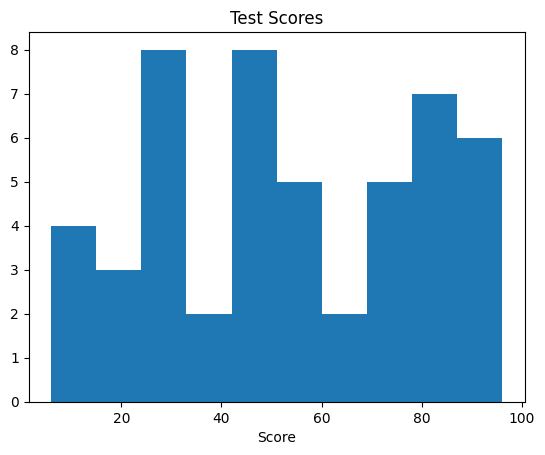

In [31]:
import matplotlib.pyplot as plt

plt.hist(ch2_1)
plt.title("Test Scores")
plt.xlabel("Score")
plt.show()



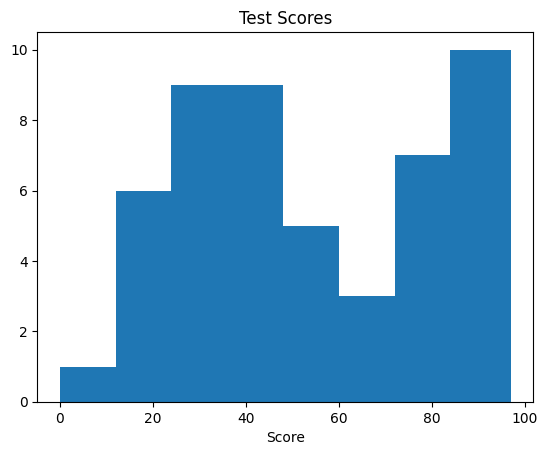

In [32]:
plt.hist(ch2_1, bins=bins)
plt.title("Test Scores")
plt.xlabel("Score")
plt.show()

## Boxplot 과 Violin 플롯 그리기
matplotlib 라이브러리를 활용하여 아래 코드와 같이 Boxplot, Violin 플롯을 그릴 수 있다.

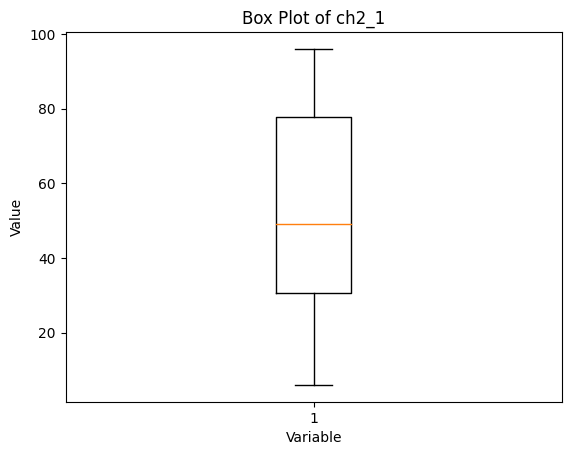

In [33]:
plt.boxplot(ch2_1)
plt.title("Box Plot of ch2_1")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.show()

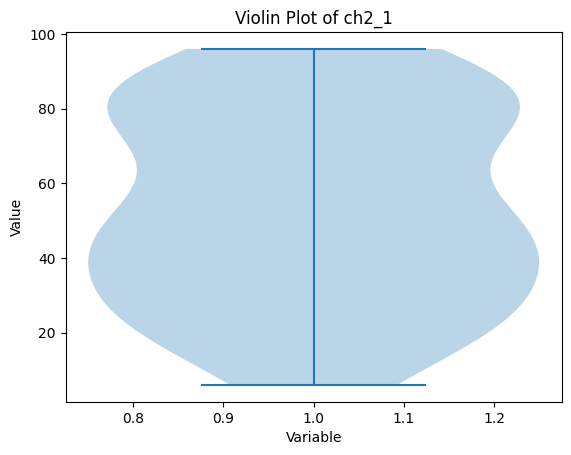

In [34]:
plt.violinplot(ch2_1)
plt.title("Violin Plot of ch2_1")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.show()